# **<font color=blue>機器學習演算法之參數調整測試</font>**

## 使用課堂所提及6種不同演算法，並對其中兩個參數做調整測試
- LogisticRegression
- RandomForest
- SVM
- KNN
- GaussianNB
- MultinomialNB

#### 這次功課中經過多次測試發現使用鳶尾花的 Sepal length特徵和Sepal width特徵準確率較高，所以本次作業都以這兩種特徵進行訓練
#### Sepal length特徵和Sepal width特徵為四種特徵的後兩種 所以取用iris.data[:, 2:4]
#### 在這次功課中也把資料集分成測試集，訓練集。以及最後計算整個模型的正確率，所以output會有三種不同的正確率。分別是
- 訓練集的準確率
- 測試及的準確率
- 模型的準確率

#### 也在圖片中加上title來區分不同演算法圖形

#### 另外導入train_test_split 來把資料分成測試集，訓練集，也導入metrics來進行最後模型正確率的計算
<br>

## 1. Logistic Regression
### 調整參數，penalty="l2", solver="newton-cg"
### solver
- newton-cg適合多類別分類，剛好是鳶尾花所需要的分類方式
- newton-cg是牛頓法家族的一種，利用損失函數二階導數矩陣來優化損失函數。
- 雖然liblinear適合小型數據集，但鳶尾花還是需要多類別分類，故不採用

### penalty
- 選擇L2解決過擬合問題
- 因為solver選擇了newton-cg，penalty只能使用l2，所以選擇l2來進行正規化的懲罰規範


### 綜合比較，使用solver="newton-cg"和penalty="l2"，相較於其他參數，能夠使模型正確率最高<br>比如l1 + saga 只有約0.806的正確率。
#### 程式碼如下

訓練集的準確率：  97.14285714285714%
測試集的準確率：  97.77777777777777%
模型的準確率：    97.77777777777777%


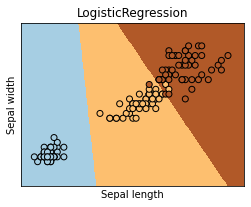

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
#載入資料
iris = datasets.load_iris()
X = iris.data[:, 2:4]#只取後兩種
Y = iris.target

#建立Logistic Regression Classifier
logreg = LogisticRegression(penalty="l2", solver="newton-cg")
#這兩個正確率最高


#進行訓練
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
logreg.fit(x_train, y_train)

#繪製座標軸
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h=.02#單位間隔
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#進行預測
Z = logreg.predict(np.c_[xx.ravel(),yy.ravel()])
print("訓練集的準確率： " , logreg.score(x_train, y_train)*100, end = "%\n")
print("測試集的準確率： " , logreg.score(x_test, y_test)*100, end = "%\n")
predictions = logreg.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions) 
print("模型的準確率：   " ,accuracy*100, end = "%\n")

#繪製預測結果
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('LogisticRegression')

plt.xlim(xx.min(),xx.max())
plt.ylim (yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## 2. Random Forest Classifier
### 調整參數，n_estimators=100, max_depth = 10
### n_estimators
- n_estimators決定建立子樹的數量，較多的n_estimators可以讓模型有較好的正確率也更穩定，不過同時會增加許多計算量
- 在這邊設定成100，讓樹產生100個子樹
- 若子樹的數量不夠，會造成正確率下降，比如只產生5個子樹，模型的正確率會跌落至91%

### max_depth
- max_depth為設定樹的最大深度
- 若設定成None不限制
- 這裡我把max_depth設定為10，若樹的深度太小會大大降低正確率，模型正確率大約下降2~3%

### 綜合比較，使用n_estimators=100, max_depth = 10，能夠使模型正確率最高，訓練集的正確率可以來到99%正確，測試集可以來到97%
### 但如果max_depth = 1或2，樹的深度不夠，測試集會跌落至95%

#### 程式碼如下

訓練集的準確率：  99.04761904761905%
測試集的準確率：  97.77777777777777%
模型的準確率：    97.77777777777777%


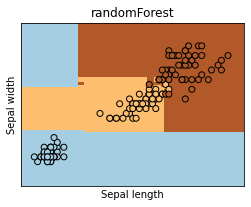

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

#載入資料
iris = datasets.load_iris()
X= iris.data[:,2 :4]
Y = iris.target

#建立RandomoretClasser
randomForest = RandomForestClassifier(n_estimators=100, max_depth = 10)

#進行訓練
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
randomForest.fit(x_train, y_train)

#繪製座標軸
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h=.02#單位間隔
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#進行預測
Z = randomForest.predict(np.c_[xx.ravel(),yy.ravel()])
print("訓練集的準確率： " , randomForest.score(x_train, y_train)*100, end = "%\n")
print("測試集的準確率： " , randomForest.score(x_test, y_test)*100, end = "%\n")
predictions = randomForest.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions) 
print("模型的準確率：   " ,accuracy*100, end = "%\n")



#繪製預測結果
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('randomForest')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


## 3. Support Vector Classifier
### 調整參數，kernel= "linear",C=1
### kernel
- 指定演算法要使用的核函數類型，選用kernel= "linear"
- 因為鳶嘴花需要分類，用linear，再這個測試集裡面用linear準確率已經非常高了
- 如果使用poly，因為鳶尾花們的分布比較不能用多項式函數來區隔，所以準確率會下降

### C
- C必須為正值
- C是正規化參數，我使用預設的1，原因是因為在c越大，在訓練樣本中準確率愈高，不過泛化能力下降

### 使用kernel= "linear",C=1已經能夠讓訓練集，測試集和模型準確率來到97%
### 使用linear的原因是，我們可以觀察鳶尾花的資料分布，三個分別集中在不同區域，剛好可以用線性函數把他們區別開來

#### 程式碼如下

訓練集的準確率：  97.14285714285714%
測試集的準確率：  97.77777777777777%
模型的準確率：    97.77777777777777%


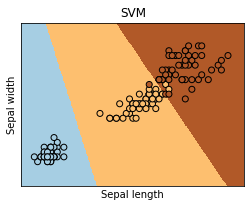

In [148]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

#載入資料
iris = datasets.load_iris()
X= iris.data[:,2 :4]
Y = iris.target

#建立SVC
svc = SVC(kernel= "linear",C=1)


#進行訓練
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
svc.fit(x_train, y_train)

#繪製座標軸
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h=.02#單位間隔
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#進行預測
Z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
print("訓練集的準確率： " , svc.score(x_train, y_train)*100, end = "%\n")
print("測試集的準確率： " , svc.score(x_test, y_test)*100, end = "%\n")
predictions = svc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions) 
print("模型的準確率：   " ,accuracy*100, end = "%\n")



#繪製預測結果
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


## 4. Kneighbors Classifier
### 調整參數，n_neighbors=1,algorithm = "auto"
### n_neighbors
- n_neighbors為KNN最重要的參數
- n_neighbors會根據所設定的數量，用類似多數決的方式去決定先在這個需要分到哪裡
- 因為每種花都有一個群，n設成1只需要尋找最旁邊的是什麼類型進行分類
- n_neighbors需要根據觀察資料的分布去決定，像鳶尾花有兩種類型的一部份靠的蠻近的，若n_neighbors太多會容易分錯

### algorithm
- auto將嘗試根據傳遞給fit方法的值來決定最合適的算法

### 我認為n_neighbors設成1是因為只需要尋找最旁邊的是什麼類型，能夠輕易分辨出不同型的花，太多容易旁邊剛好多一些別種類的花，就被分成該類型的花(在上面有提到原因)
### 而n_neighbors設成1的訓練集準確率可以來到99%，而測試集和模型正確率也都有不錯的97%，但如果n_neighbors太多，ex20，訓練集準確率會下降大約2~3%

#### 程式碼如下

訓練集的準確率：  99.04761904761905%
測試集的準確率：  97.77777777777777%
模型的準確率：    97.77777777777777%


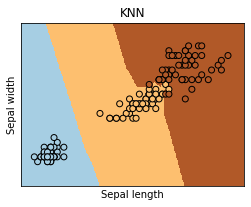

In [147]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

#載入資料
iris = datasets.load_iris()
X= iris.data[:,2 :4]
Y = iris.target

#建立KNN
knn =  KNeighborsClassifier(n_neighbors=1,algorithm = "auto")



#進行訓練
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
knn.fit(x_train, y_train)

#繪製座標軸
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h=.02#單位間隔
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#進行預測
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
print("訓練集的準確率： " , knn.score(x_train, y_train)*100, end = "%\n")
print("測試集的準確率： " , knn.score(x_test, y_test)*100, end = "%\n")
predictions = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions) 
print("模型的準確率：   " ,accuracy*100, end = "%\n")



#繪製預測結果
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('KNN')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


## 5. GaussianNB
### 調整參數，priors=None, var_smoothing=1e-09
### priors
- priors為主要參數，用來檢驗概率
- 在這邊設定為None

### var_smoothing
- var_smoothing用來將所有特徵的變異數中最⼤的變異數，以某個比例添加到估計的變異數中

### gaussianNB運用貝式定理，適合處理多個類別的分類問題，也是適合鳶嘴花分類，訓練集準確率有95%，而測試集和模型正確率也都有97%

#### 程式碼如下

訓練集的準確率：  95.23809523809523%
測試集的準確率：  97.77777777777777%
模型的準確率：    97.77777777777777%


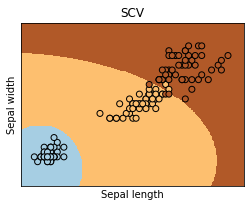

In [68]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

#載入資料
iris = datasets.load_iris()
X= iris.data[:,2 :4]#
Y = iris.target

#GaussianNB
gaussianNB = GaussianNB(priors=None, var_smoothing=1e-09)



#進行訓練
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
gaussianNB.fit(x_train, y_train)

#繪製座標軸
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h=.02#單位間隔
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#進行預測
Z = gaussianNB.predict(np.c_[xx.ravel(),yy.ravel()])
print("訓練集的準確率： " , gaussianNB.score(x_train, y_train)*100, end = "%\n")
print("測試集的準確率： " , gaussianNB.score(x_test, y_test)*100, end = "%\n")
predictions = gaussianNB.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions) 
print("模型的準確率：   " ,accuracy*100, end = "%\n")



#繪製預測結果
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('GaussianNB')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()


## 6. MultinomialNB
### 調整參數，alpha=1, fit_prior=False
### alpha
- alpha用來添加拉普拉斯平滑
- 在這邊設定為1，太大會造成準確率下降

### fit_prior
- fit_prior是否要考慮先驗機率
- 若設定成True會造成正確率大大下降，大約只有40%正確率

### 我認為因為鳶嘴花適合分類，MultinomialNB適合離散形資料，故在這邊成效不佳，相較其他演算法，MultinomialNB只有約8成正確率
### 如果用來分析類似covid-19確診原因較為合適

#### 程式碼如下

訓練集的準確率：  79.04761904761905%
測試集的準確率：  82.22222222222221%
模型的準確率：    82.22222222222221%


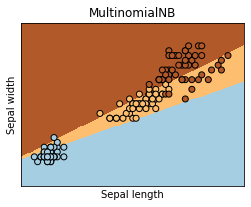

In [114]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

#載入資料
iris = datasets.load_iris()
X= iris.data[:,2 :4]#只取前兩種特徵
Y = iris.target

#建立MultinomialNB
multinomialNB = MultinomialNB(alpha=1, fit_prior=False)




#進行訓練
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
multinomialNB.fit(x_train, y_train)

#繪製座標軸
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5
y_min, y_max = x_train[:, 1].min() - .5, x_train[:, 1].max() + .5
h=.02#單位間隔
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#進行預測
Z = multinomialNB.predict(np.c_[xx.ravel(),yy.ravel()])
print("訓練集的準確率： " , multinomialNB.score(x_train, y_train)*100, end = "%\n")
print("測試集的準確率： " , multinomialNB.score(x_test, y_test)*100, end = "%\n")
predictions = multinomialNB.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions) 
print("模型的準確率：   " ,accuracy*100, end = "%\n")



#繪製預測結果
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('MultinomialNB')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()
